<a href="https://colab.research.google.com/github/mukami3juma/-hello-world-/blob/master/Core_Week_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
# reading data
df = pd.read_csv('http://bit.ly/DSCoreAutolibDataset')
df.head()

,Postal code,date,n_daily_data_points,dayOfWeek,day_type,BlueCars_taken_sum,BlueCars_returned_sum,Utilib_taken_sum,Utilib_returned_sum,Utilib_14_taken_sum,Utilib_14_returned_sum,Slots_freed_sum,Slots_taken_sum
0,75001,1/1/2018,1440,0,weekday,110,103,3,2,10,9,22,20
1,75001,1/2/2018,1438,1,weekday,98,94,1,1,8,8,23,22
2,75001,1/3/2018,1439,2,weekday,138,139,0,0,2,2,27,27
3,75001,1/4/2018,1320,3,weekday,104,104,2,2,9,8,25,21
4,75001,1/5/2018,1440,4,weekday,114,117,3,3,6,6,18,20


In [4]:
# descriptive statistics
df.dtypes

Postal code                int64
date                      object
n_daily_data_points        int64
dayOfWeek                  int64
day_type                  object
BlueCars_taken_sum         int64
BlueCars_returned_sum      int64
Utilib_taken_sum           int64
Utilib_returned_sum        int64
Utilib_14_taken_sum        int64
Utilib_14_returned_sum     int64
Slots_freed_sum            int64
Slots_taken_sum            int64
dtype: object

In [5]:
# checking for missing values
df.isnull().sum()
# data has no missing values

Postal code               0
date                      0
n_daily_data_points       0
dayOfWeek                 0
day_type                  0
BlueCars_taken_sum        0
BlueCars_returned_sum     0
Utilib_taken_sum          0
Utilib_returned_sum       0
Utilib_14_taken_sum       0
Utilib_14_returned_sum    0
Slots_freed_sum           0
Slots_taken_sum           0
dtype: int64

In [6]:
# since we are working with days of the week, we've replaced numbers with the exact days
df['dayOfWeek'] = df.dayOfWeek.replace({0 :'Monday', 1:'Tuesday', 2:'Wednesday', 3:'Thursday', 4:'Friday',5:'Saturday', 6:'Sunday'})
df.tail()

,Postal code,date,n_daily_data_points,dayOfWeek,day_type,BlueCars_taken_sum,BlueCars_returned_sum,Utilib_taken_sum,Utilib_returned_sum,Utilib_14_taken_sum,Utilib_14_returned_sum,Slots_freed_sum,Slots_taken_sum
16080,95880,6/15/2018,1440,Friday,weekday,15,10,0,0,2,3,0,0
16081,95880,6/16/2018,1440,Saturday,weekend,19,19,0,0,2,1,0,0
16082,95880,6/17/2018,1440,Sunday,weekend,33,35,1,1,0,0,0,0
16083,95880,6/18/2018,1440,Monday,weekday,11,14,3,5,2,2,0,0
16084,95880,6/19/2018,1370,Tuesday,weekday,2,2,2,1,0,0,0,0


In [7]:
# renaming column one and finding the inputs per postal code of area
df.rename(columns = {'Postal code':'Postal_code'}, inplace = True)
df.Postal_code.value_counts()

94130    156
92310    156
78140    156
94700    156
95100    156
        ... 
93150    151
93370    149
92340    147
93200    126
93390     84
Name: Postal_code, Length: 104, dtype: int64

In [8]:
df.dayOfWeek.value_counts()
# There's inconsistent input for various days of the week. This may affect our hypothesis

Monday       2374
Tuesday      2363
Sunday       2274
Friday       2271
Thursday     2268
Wednesday    2268
Saturday     2267
Name: dayOfWeek, dtype: int64

In [9]:
df['BlueCars_taken_sum'].describe()

count    16085.000000
mean       125.926951
std        185.426579
min          0.000000
25%         20.000000
50%         46.000000
75%        135.000000
max       1352.000000
Name: BlueCars_taken_sum, dtype: float64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


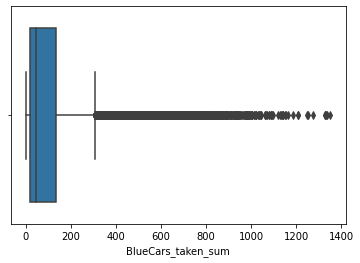

In [10]:
# checking for outliers
sns.boxplot(df['BlueCars_taken_sum'])

In [11]:
# determining the outliers by creating a range of numbers,which if exceeded results in outliers
lower_bound = df['BlueCars_taken_sum'].quantile(0.1)
upper_bound = df['BlueCars_taken_sum'].quantile(0.9)
                                              
print(lower_bound)
print(upper_bound)
# this means any BlueCars_taken_sum number below 9 and above 396 will be considered as an oulier

# the data below shows the outliers in our dataset
print(df[df['BlueCars_taken_sum'] < lower_bound])
print(df[df['BlueCars_taken_sum'] > upper_bound])

9.0
396.0
       Postal_code       date  ...  Slots_freed_sum Slots_taken_sum
54           75001  2/24/2018  ...                0               0
155          75001  6/19/2018  ...                0               0
311          75002  6/19/2018  ...                1               1
3120         75112   1/1/2018  ...                1               1
3121         75112   1/2/2018  ...                0               0
...            ...        ...  ...              ...             ...
16056        95880  5/22/2018  ...                0               0
16062        95880  5/28/2018  ...                0               0
16066        95880   6/1/2018  ...                0               0
16070        95880   6/5/2018  ...                0               0
16084        95880  6/19/2018  ...                0               0

[1472 rows x 13 columns]
      Postal_code       date  ...  Slots_freed_sum Slots_taken_sum
377         75003  3/10/2018  ...               89              92
629         75

In [12]:
# removing the outliers by creating a new dataframe
df1 = df[(df['BlueCars_taken_sum'] >= lower_bound) & (df['BlueCars_taken_sum'] <= upper_bound)]
df1

,Postal_code,date,n_daily_data_points,dayOfWeek,day_type,BlueCars_taken_sum,BlueCars_returned_sum,Utilib_taken_sum,Utilib_returned_sum,Utilib_14_taken_sum,Utilib_14_returned_sum,Slots_freed_sum,Slots_taken_sum
0,75001,1/1/2018,1440,Monday,weekday,110,103,3,2,10,9,22,20
1,75001,1/2/2018,1438,Tuesday,weekday,98,94,1,1,8,8,23,22
2,75001,1/3/2018,1439,Wednesday,weekday,138,139,0,0,2,2,27,27
3,75001,1/4/2018,1320,Thursday,weekday,104,104,2,2,9,8,25,21
4,75001,1/5/2018,1440,Friday,weekday,114,117,3,3,6,6,18,20
...,...,...,...,...,...,...,...,...,...,...,...,...,...
16079,95880,6/14/2018,1439,Thursday,weekday,15,13,0,0,0,0,0,0
16080,95880,6/15/2018,1440,Friday,weekday,15,10,0,0,2,3,0,0
16081,95880,6/16/2018,1440,Saturday,weekend,19,19,0,0,2,1,0,0
16082,95880,6/17/2018,1440,Sunday,weekend,33,35,1,1,0,0,0,0


In [13]:
# showing size of dataframe before and after removing outliers
print(df.shape)
print(df1.shape)

(16085, 13)
(13007, 13)


In [14]:
# since we are dealing with bluecars, we'll drop any column after returned blue cars
df1.drop(df1.loc[:, 'Utilib_taken_sum':].columns, axis = 1).head()

,Postal_code,date,n_daily_data_points,dayOfWeek,day_type,BlueCars_taken_sum,BlueCars_returned_sum
0,75001,1/1/2018,1440,Monday,weekday,110,103
1,75001,1/2/2018,1438,Tuesday,weekday,98,94
2,75001,1/3/2018,1439,Wednesday,weekday,138,139
3,75001,1/4/2018,1320,Thursday,weekday,104,104
4,75001,1/5/2018,1440,Friday,weekday,114,117


In [15]:
df1.dayOfWeek.value_counts()

Monday       1932
Sunday       1880
Tuesday      1871
Friday       1856
Thursday     1853
Wednesday    1850
Saturday     1765
Name: dayOfWeek, dtype: int64

In [16]:
# univariate summary statistics for measures of central tendency and measures of dispersion/Variability/Spread
# (numerical variables)
df1['BlueCars_taken_sum'].describe()
# we will derive our sample mean from here

count    13007.000000
mean        81.886676
std         88.928037
min          9.000000
25%         24.000000
50%         45.000000
75%        101.000000
max        396.000000
Name: BlueCars_taken_sum, dtype: float64

In [17]:
# the population measures of central of tendency
df['BlueCars_taken_sum'].describe()

count    16085.000000
mean       125.926951
std        185.426579
min          0.000000
25%         20.000000
50%         46.000000
75%        135.000000
max       1352.000000
Name: BlueCars_taken_sum, dtype: float64

In [18]:
# Remaining measures of Central Tendency for univariate summary
print('median = ',df1['BlueCars_taken_sum'].median())
print('mode = ',df1['BlueCars_taken_sum'].mode())

median =  45.0
mode =  0    12
dtype: int64


In [19]:
# Univariate summary for remaining measures of Dispersion/Variability/Spread
print('variance =',df1['BlueCars_taken_sum'].var())
print('skewness =',df1['BlueCars_taken_sum'].skew())
print('kurtosis =',df1['BlueCars_taken_sum'].kurt())
print('minimum =',df1['BlueCars_taken_sum'].min())
print('maximum =',df1['BlueCars_taken_sum'].max())
print('quantile =',df1['BlueCars_taken_sum'].quantile([0.25,0.50,0.75]))
print('range = ', (df1['BlueCars_taken_sum'].max() - df1['BlueCars_taken_sum'].min()))

variance = 7908.195675920454
skewness = 1.8058878322948464
kurtosis = 2.5299506328173904
minimum = 9
maximum = 396
quantile = 0.25     24.0
0.50     45.0
0.75    101.0
Name: BlueCars_taken_sum, dtype: float64
range =  387


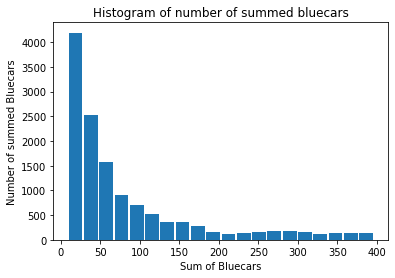

In [20]:
# categorical variable
df2 = df1['BlueCars_taken_sum']

plt.hist(df2, bins=20, histtype ='bar', rwidth=0.9)
plt.xlabel('Sum of Bluecars')
plt.ylabel('Number of summed Bluecars')
plt.title('Histogram of number of summed bluecars')
plt.show()

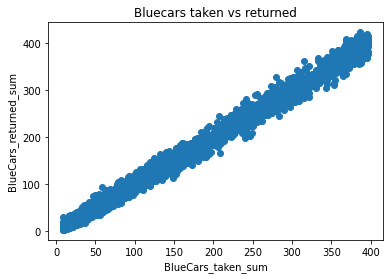

0.996855301869679


In [21]:
# Bivariate summary
#(Numerical and numerical variables)
plt.scatter(df1["BlueCars_taken_sum"] , df1["BlueCars_returned_sum"])

# Giving our scatterplot a title
plt.title('Bluecars taken vs returned')

# Labelling our x axis
plt.xlabel('BlueCars_taken_sum')

# Labelling our y axis
plt.ylabel('BlueCars_returned_sum')

# We then display our scatterplot as shown below
plt.show()

coeff = df1["BlueCars_taken_sum"].corr(df1["BlueCars_returned_sum"]) 
print(coeff)

# There is a strong positive correlation between bluecars taken and returned 
# because the returned bluecars increase with increase in taken cars.

In [22]:
# Stratified sampling using day type to focus on weekends as it is the basis of the hypothesis testing

# We use stratified sample because
strat_df = df1.groupby('day_type', group_keys=False).apply(lambda x : x.sample(frac=0.1))

# proportion of the non_stratified sample
print(strat_df['day_type'].value_counts())

# Check the stratified output
strat_df

weekday    936
weekend    364
Name: day_type, dtype: int64


,Postal_code,date,n_daily_data_points,dayOfWeek,day_type,BlueCars_taken_sum,BlueCars_returned_sum,Utilib_taken_sum,Utilib_returned_sum,Utilib_14_taken_sum,Utilib_14_returned_sum,Slots_freed_sum,Slots_taken_sum
6931,92260,3/15/2018,1440,Thursday,weekday,27,28,2,2,5,4,0,0
6314,92220,3/22/2018,1440,Thursday,weekday,65,58,3,2,5,4,0,0
10258,93110,5/30/2018,1440,Wednesday,weekday,21,21,5,5,1,1,0,0
15351,94700,2/16/2018,1439,Friday,weekday,39,41,0,0,1,3,0,0
5364,92150,3/8/2018,1439,Thursday,weekday,147,142,1,3,15,17,5,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
242,75002,3/31/2018,1440,Saturday,weekend,247,248,9,9,18,18,44,44
1015,75007,3/24/2018,1440,Saturday,weekend,375,389,16,14,19,19,167,177
13961,94150,3/4/2018,1440,Sunday,weekend,9,5,0,0,1,1,1,0
4743,92110,3/10/2018,1440,Saturday,weekend,31,32,1,1,1,2,0,0


In [48]:
# claim is to test that the average number of bluecars taken on saturdays are less than those taken on Sundays
# Assumptions are the variables are normally distributed, are independent and the sample is randomly selected.

# null hypothesis is that the average number of bluecars taken on saturday is similar to that of sunday
# alternate hypothesis is that the average number of bluecars taken on saturday is less than that of sunday

# We use Z-test for hypothesis testing as the sample is above 30 and our significance level is 0.05

import scipy.stats as stats

mu = df1['BlueCars_taken_sum'].mean() # population mean
alpha = 0.05
x_bar = strat_df['BlueCars_taken_sum'].mean() # sample mean
n = len(strat_df) # sample size
std_dev = df1['BlueCars_taken_sum'].std() # population standard deviation

print('population mean :',mu)
print('singificance level :',alpha)
print('sample mean :',x_bar)
print('sample size :',n)
print('population standard deviation :', std_dev)

critical_value = stats.norm.isf(alpha) # test is one tailed to the left
print('critical_value',critical_value)

z_statistic = (x_bar - mu)/(std_dev/np.sqrt(n))
print('z_statistic :',z_statistic)

if z_statistic > critical_value:
  print('Reject null hypothesis and accept the alternate hypotheis')
else:
  print('Conclusion: ', 'Do not reject the null hypothesis')

# conclusion is that the average number of bluecars taken on saturday is similar to that of sunday

population mean : 81.88667640501268
singificance level : 0.05
sample mean : 85.18846153846154
sample size : 1300
population standard deviation : 88.92803650098463
critical_value 1.6448536269514729
z_statistic : 1.3386954292061493
Conclusion:  Do not reject the null hypothesis
